In [ ]:
import pandas as pd

In [6]:
df = pd.read_csv('Admission_Predict - Admission_Predict.csv')

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Serial No serves no purpose

In [13]:
df.drop('Serial No.', axis=1, inplace=True)

In [14]:
for col in df.columns:
    unique_values = df[col].nunique()
    total_values = len(df[col])

    if unique_values <= 10:
        print(f'{col} is likely a categorical column')
    else:
        print(f'{col} is likely a continous column')

GRE Score is likely a numerical column
TOEFL Score is likely a numerical column
University Rating is likely a categorical column
SOP is likely a categorical column
LOR is likely a categorical column
CGPA is likely a numerical column
Research is likely a categorical column
Chance of Admit is likely a numerical column


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [17]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [18]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

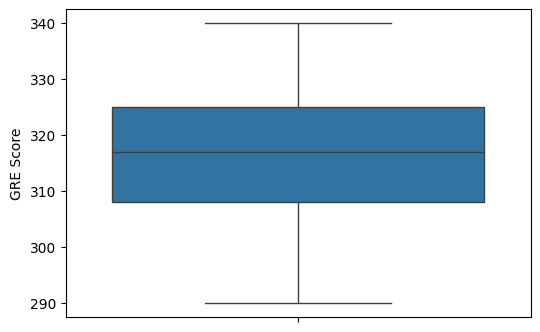

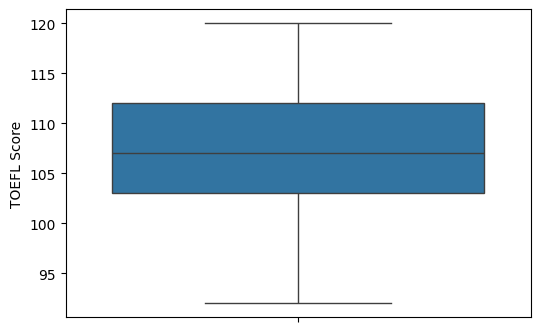

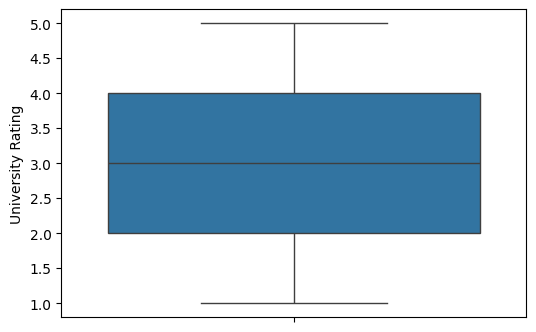

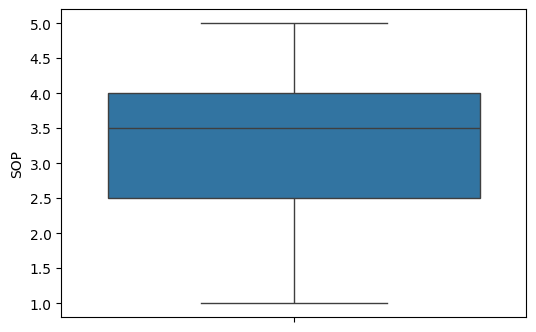

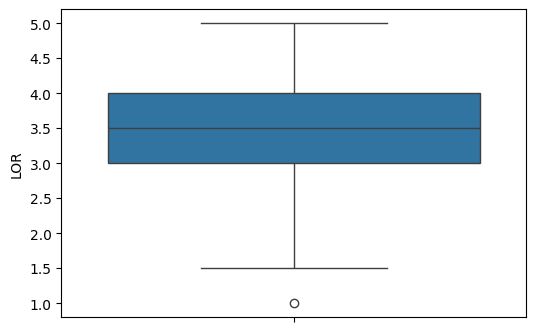

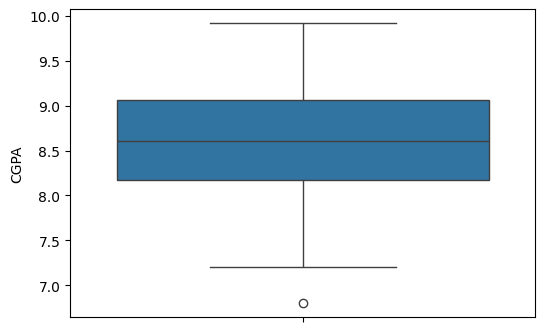

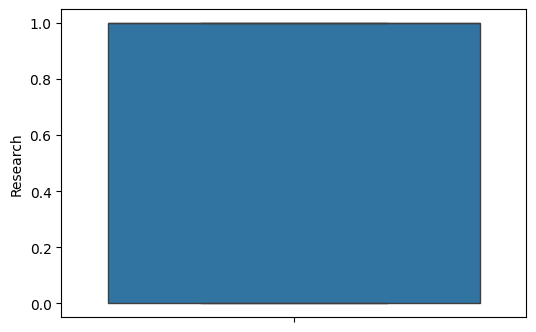

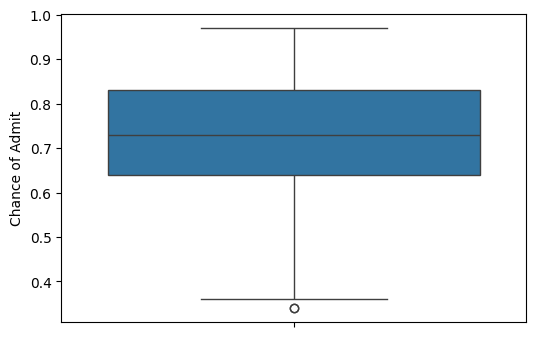

In [26]:
for col in df.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(df[col])
  plt.show()

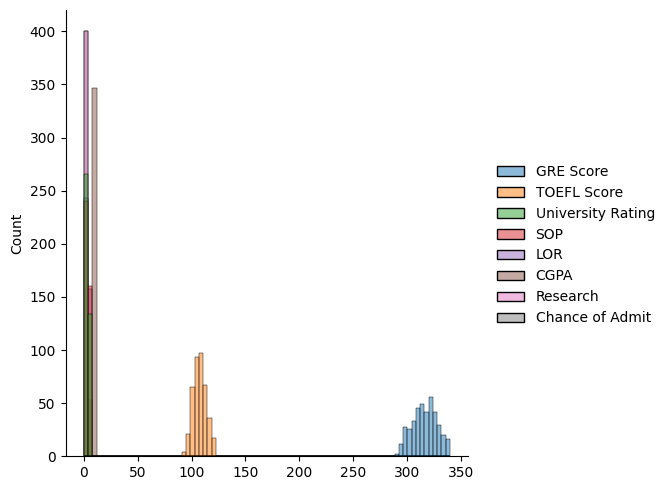

In [28]:
sns.displot(df)

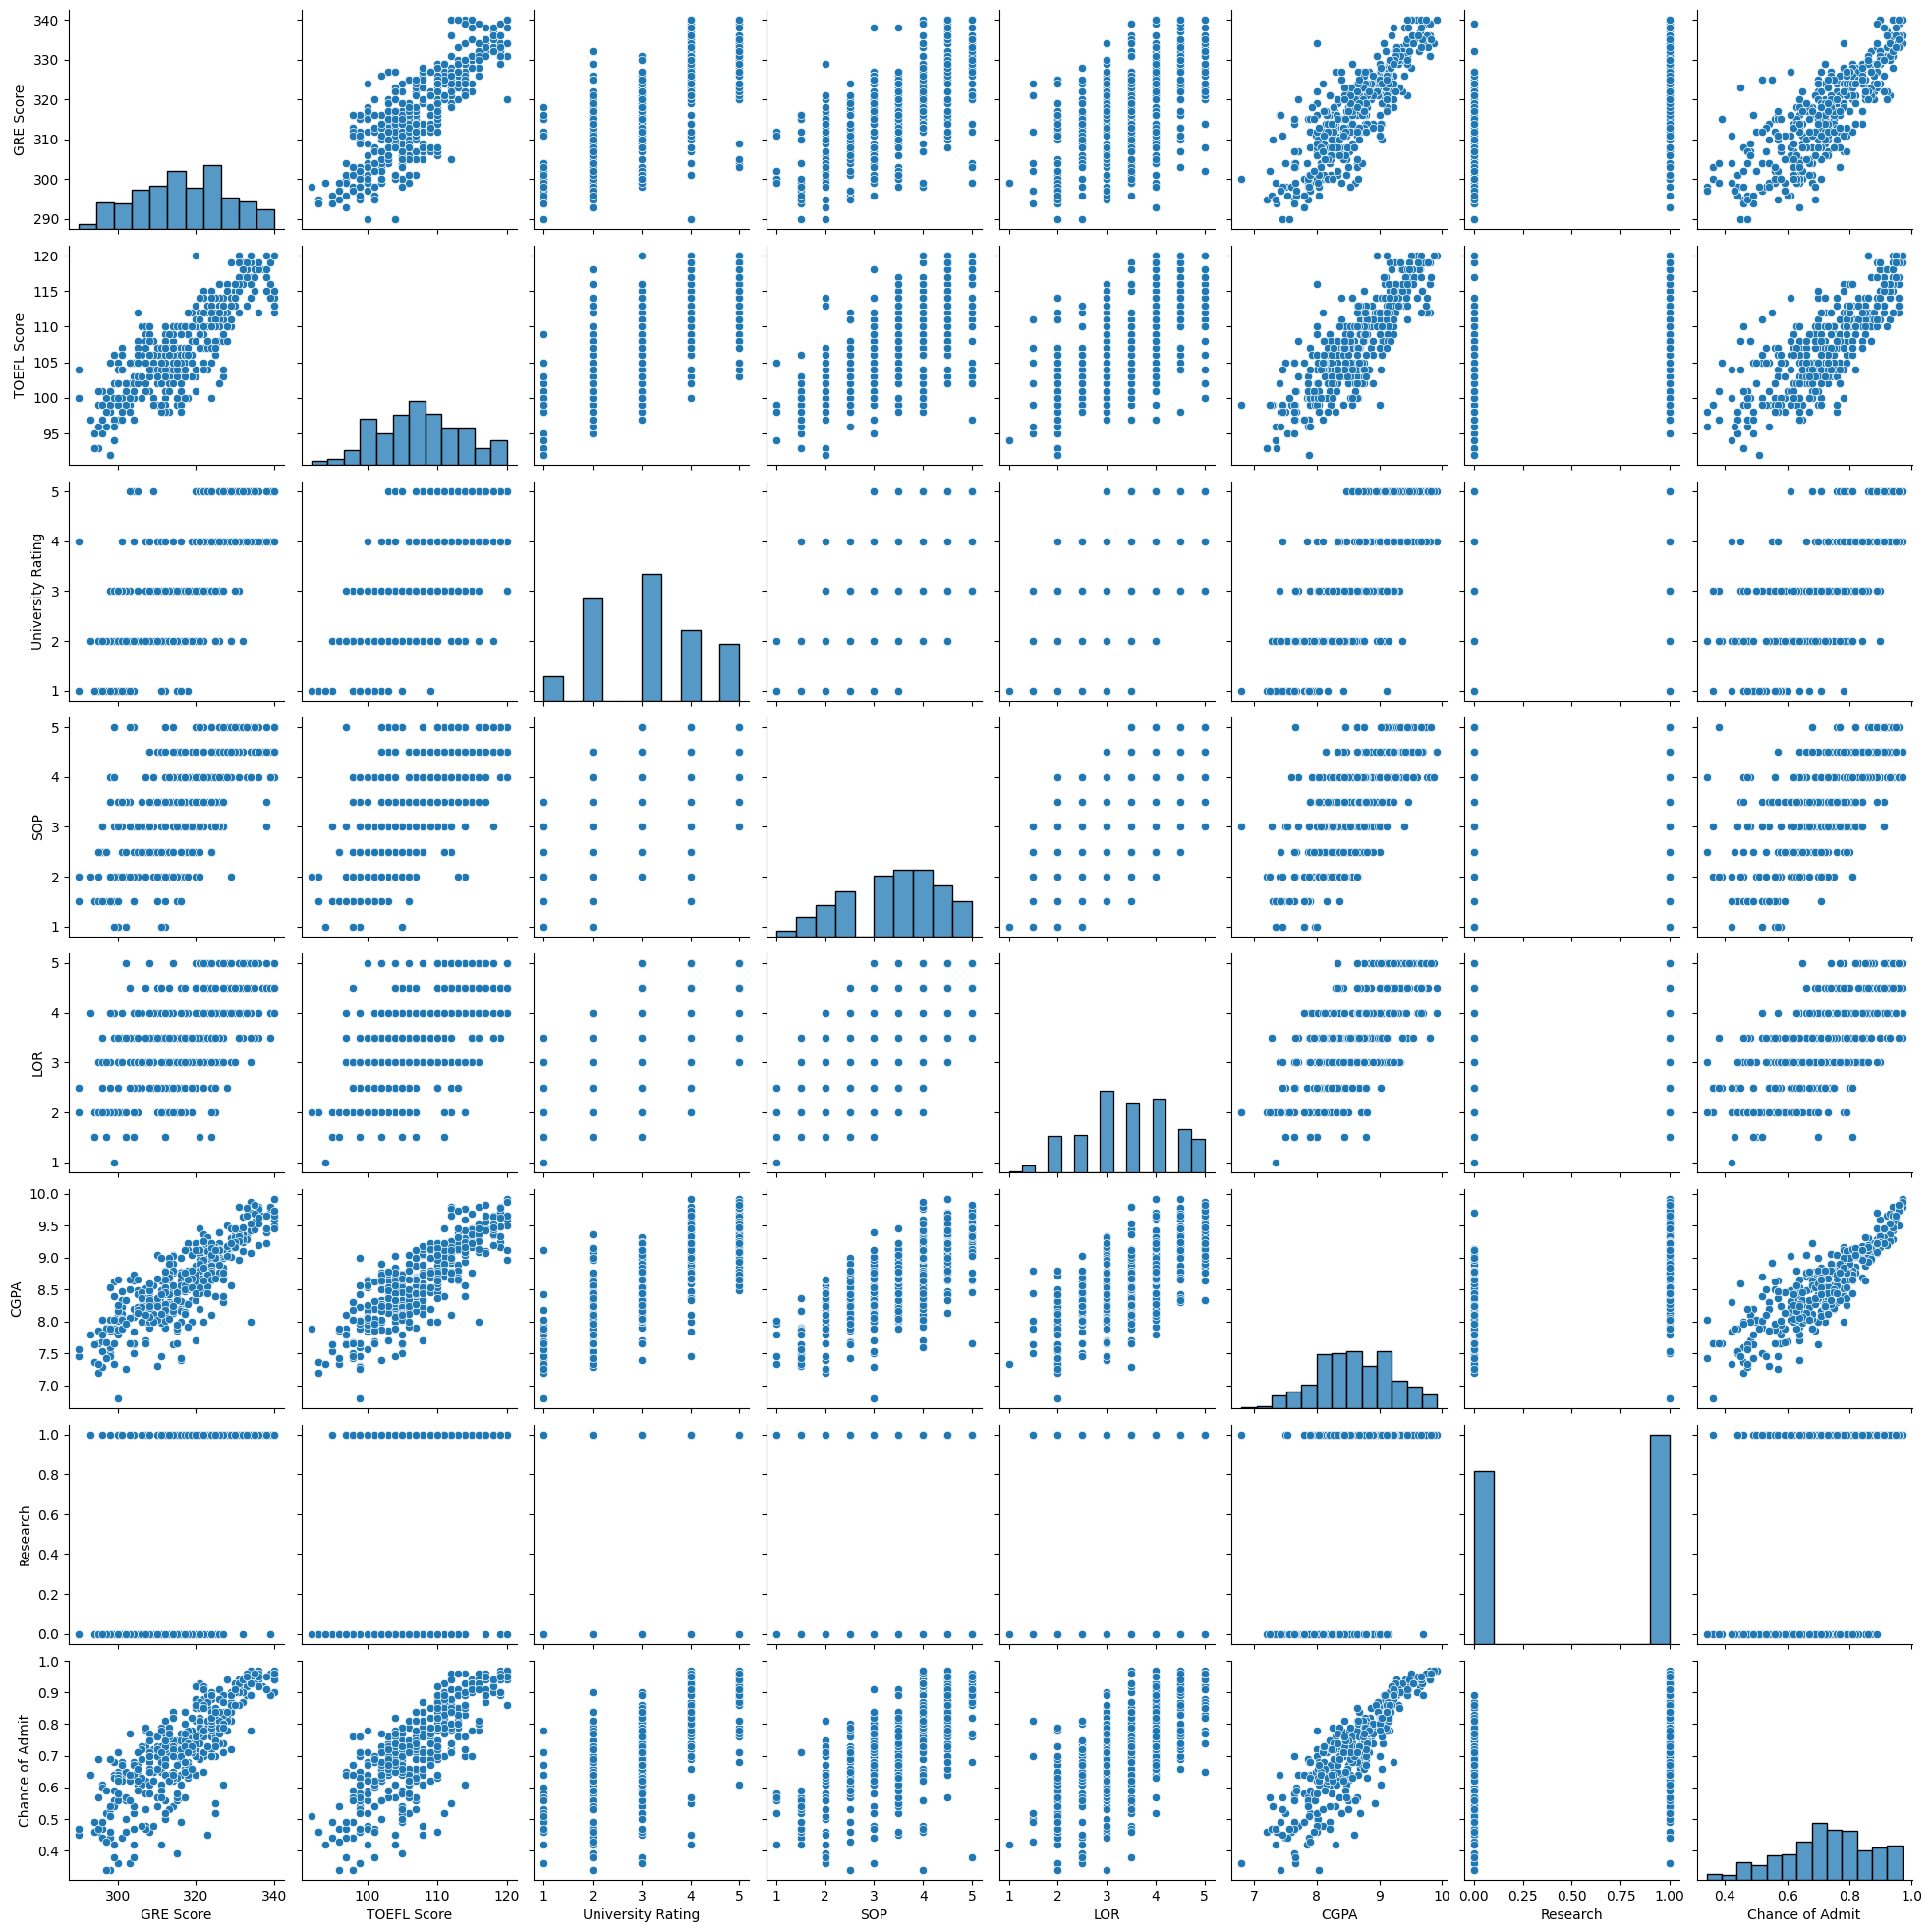

In [29]:
sns.pairplot(df)

In [30]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


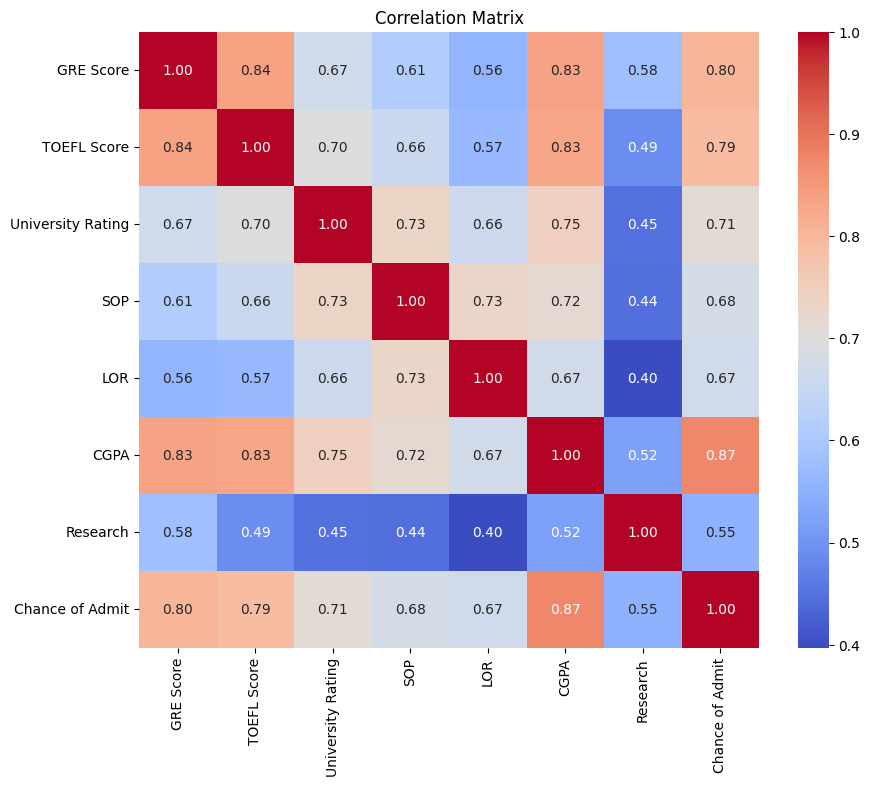

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [34]:
scaled_df[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>, <Axes: title={'center': 'LOR'}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

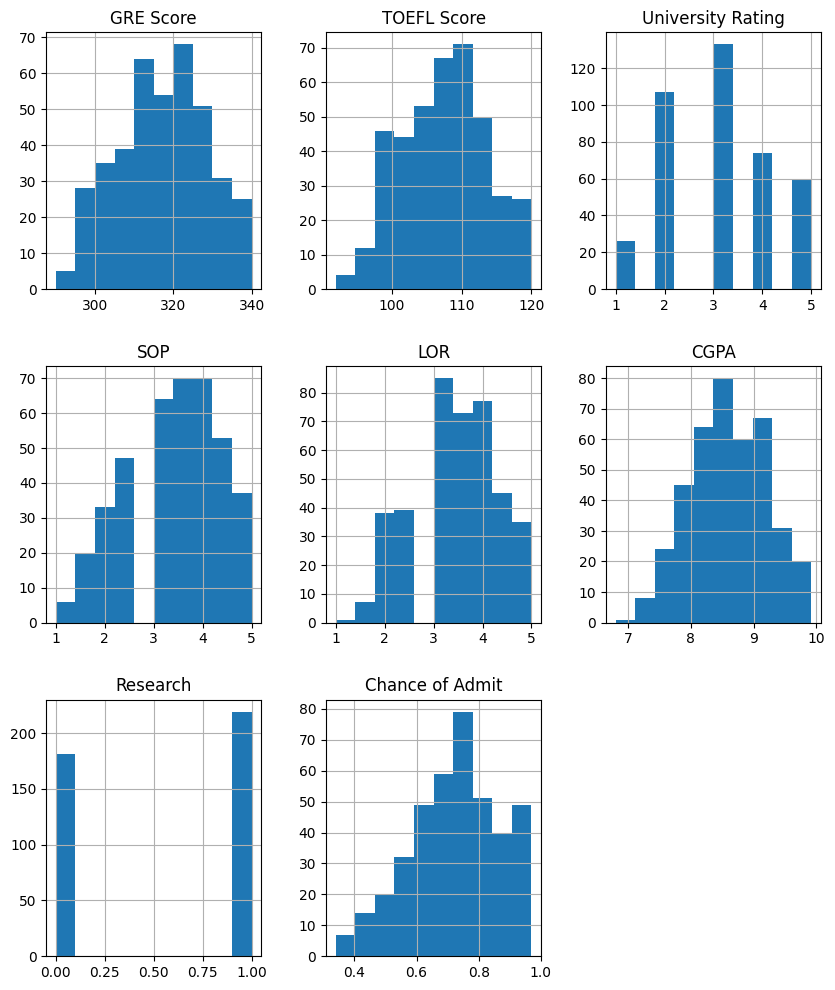

In [36]:
df.hist(figsize=(10,12))

In [38]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>, <Axes: title={'center': 'LOR'}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

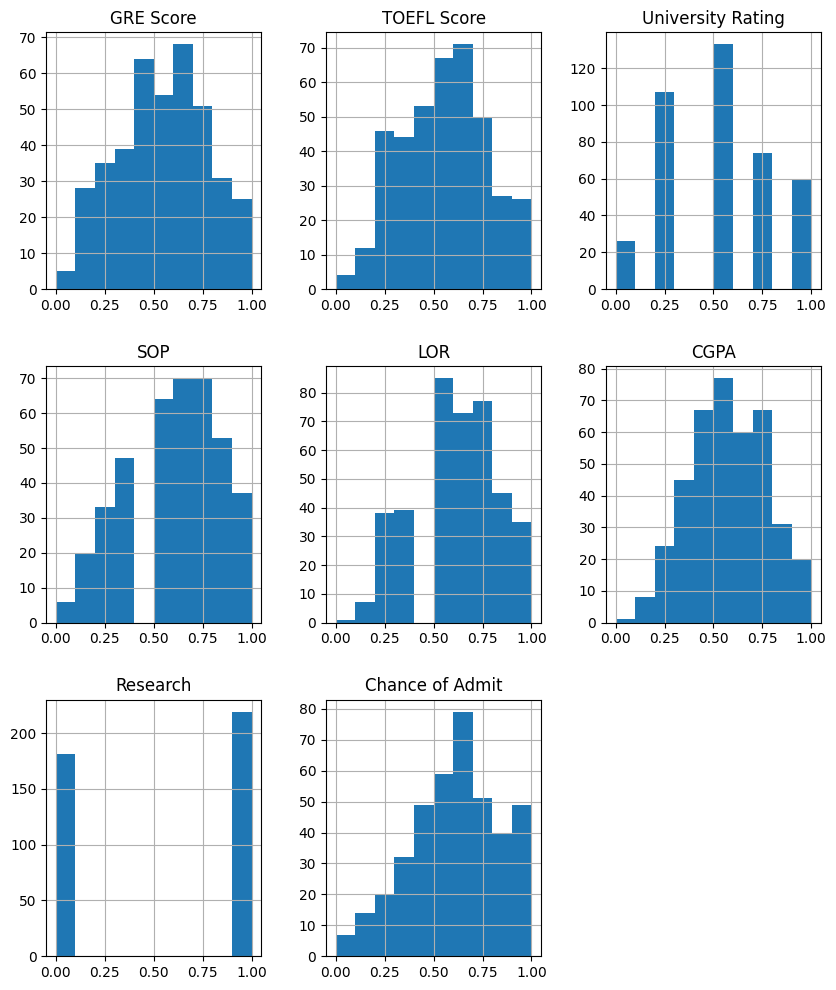

In [39]:
scaled_df.hist(figsize=(10,12))

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled


StandardScaler()

In [41]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [44]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [45]:
print(df.CGPA.values.shape)
print(df["Chance of Admit"].values.shape)

# Reshape
x = df.drop(['Chance of Admit'], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit"].values.reshape(-1,1)
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


In [46]:
linear_reg.fit(x,y)

LinearRegression()

In [47]:
#training and testing split
#400- 320 training & 80- testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
# Creat the model and fit the x&y values.
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

In [49]:
# test my algo
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


In [50]:
#overfitting and unfitting
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))

R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


In [51]:
#GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

In [52]:
# Decision Tree Library
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
y_head_dtr = tree_reg.predict(x_test)
y_head_dtr

array([0.62, 0.73, 0.94, 0.81, 0.34, 0.91, 0.34, 0.38, 0.7 , 0.91, 0.79,
       0.94, 0.49, 0.88, 0.76, 0.75, 0.71, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.66, 0.56, 0.95, 0.84, 0.71, 0.68, 0.69, 0.82, 0.84, 0.94, 0.48,
       0.44, 0.72, 0.71, 0.72, 0.79, 0.71, 0.93, 0.73, 0.65, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.94, 0.91, 0.93, 0.74, 0.79, 0.95, 0.7 ,
       0.68, 0.72, 0.83, 0.34, 0.88, 0.64, 0.62, 0.63, 0.47, 0.71, 0.52,
       0.64, 0.89, 0.88, 0.85, 0.75, 0.84, 0.93, 0.9 , 0.54, 0.76, 0.77,
       0.56, 0.89, 0.85])

In [54]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.009931249999999999
RMSE for DT: 0.09965565713997374
MAE for DT: 0.064375
R² Score for DT: 0.6154160326012967


In [55]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(max_depth=5, min_samples_split=7, splitter='random')
Best Score (R2): 0.7131510705659425
Test Score (R2): 0.7821174695218072


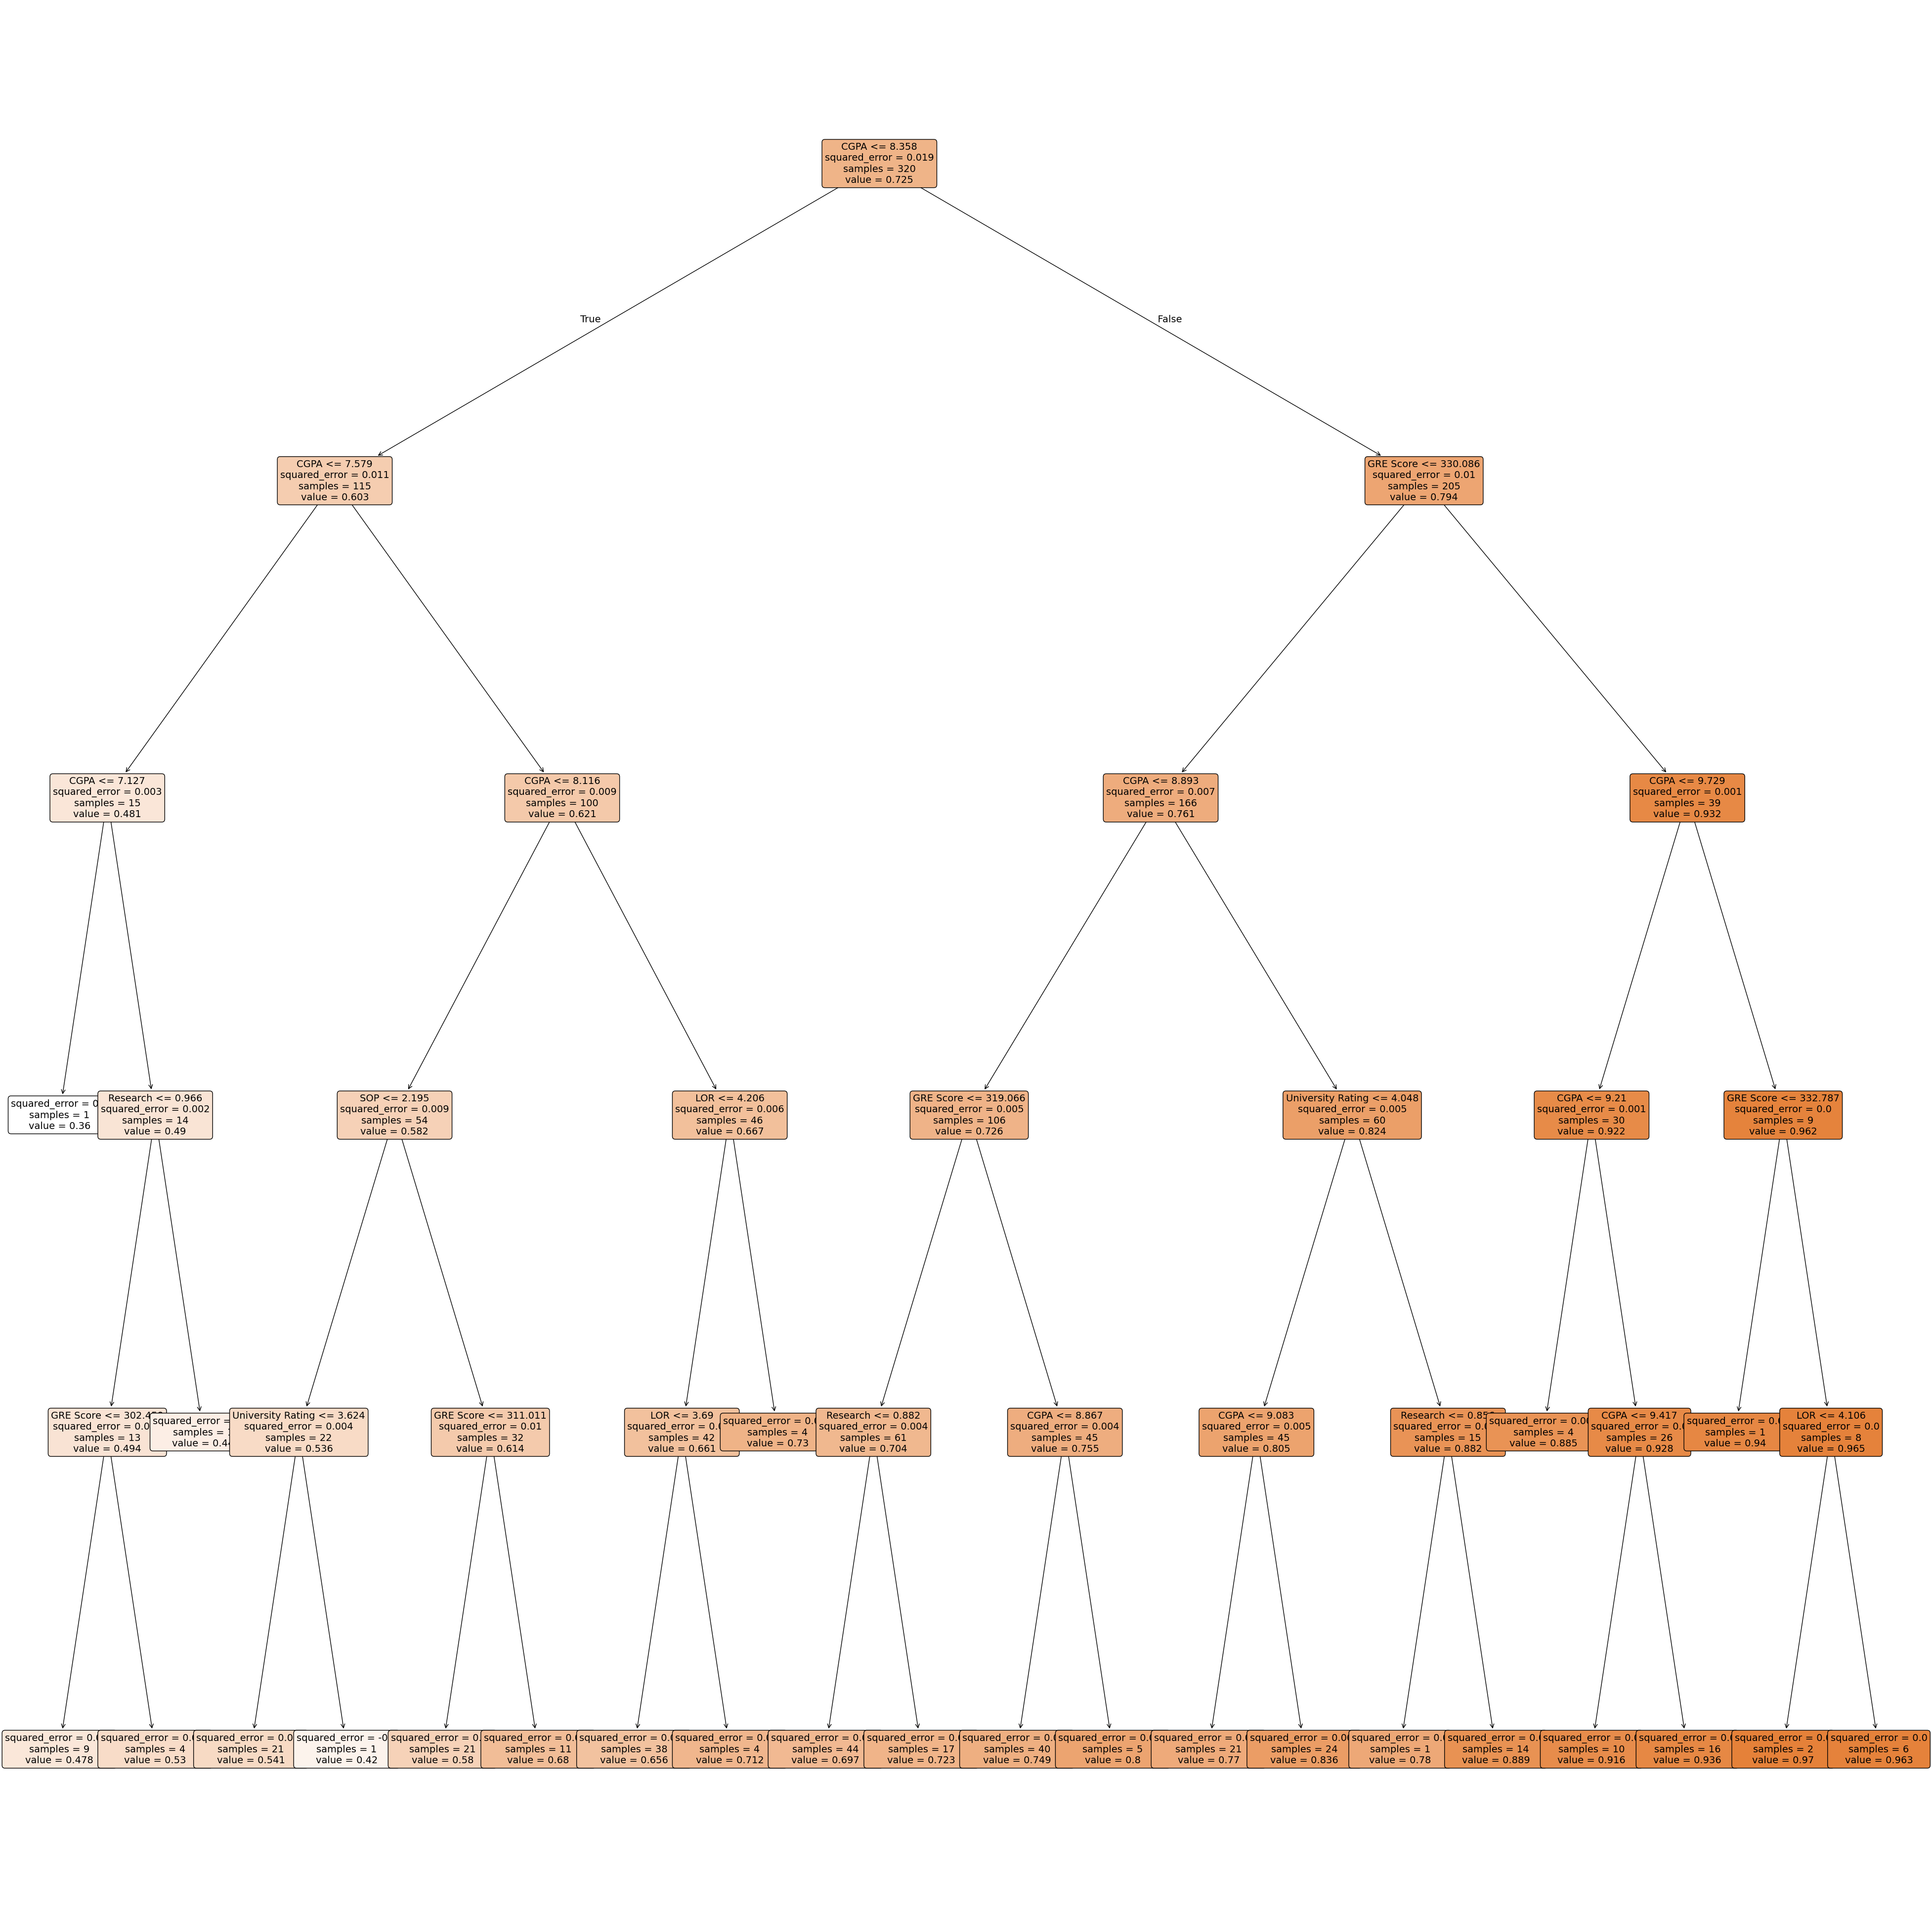

In [56]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [57]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators = 100 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [58]:
y_rf=random_forest_reg.predict(x_test)
y_rf

array([0.6652, 0.7245, 0.9401, 0.8184, 0.5838, 0.9179, 0.5767, 0.4608,
       0.6788, 0.9065, 0.723 , 0.9394, 0.5179, 0.8991, 0.7219, 0.6711,
       0.7106, 0.4725, 0.7084, 0.9599, 0.6182, 0.6773, 0.7045, 0.5529,
       0.9441, 0.7998, 0.7313, 0.5765, 0.7095, 0.8072, 0.804 , 0.9429,
       0.6367, 0.4574, 0.7052, 0.6672, 0.7   , 0.6893, 0.632 , 0.9235,
       0.7489, 0.6423, 0.7598, 0.9492, 0.8791, 0.8403, 0.9645, 0.6548,
       0.9336, 0.8943, 0.9103, 0.7079, 0.7675, 0.9437, 0.5714, 0.5915,
       0.6902, 0.8427, 0.5731, 0.8762, 0.6411, 0.6468, 0.6788, 0.4532,
       0.6756, 0.6435, 0.6094, 0.8608, 0.8849, 0.7742, 0.6967, 0.821 ,
       0.9223, 0.8596, 0.5443, 0.7359, 0.6915, 0.5482, 0.8419, 0.7722])

In [59]:
print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [60]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.009931249999999999
RMSE for DT: 0.09965565713997374
MAE for DT: 0.064375
R² Score for DT: 0.6154160326012967
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.7821174695218072
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [61]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6154160326012967
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7821174695218072
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239


In [62]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with rf without tuning----------------------------------------------")
b2=random_forest_reg.predict(c)
print(b2)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.36]
--------------------Prediction with rf without tuning----------------------------------------------
[0.4408]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


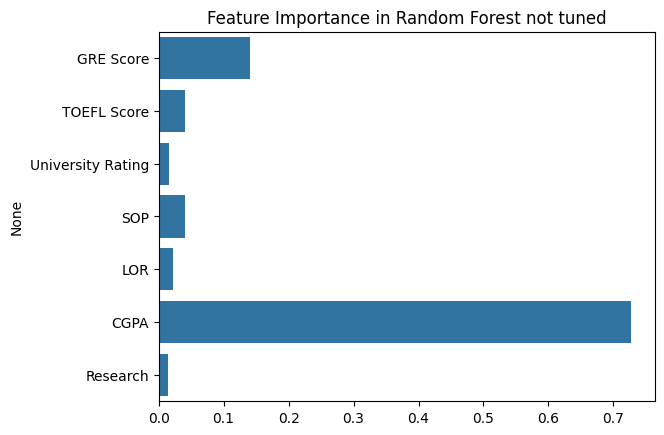

In [63]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()

In [64]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg1 = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20 )
# n_estimators = 900 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg1.fit(x_train,y_train)
y_rf1=random_forest_reg1.predict(x_test)
print("--------------------Result for RF  tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------------Result for RF  tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


In [65]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6154160326012967
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7821174695218072
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


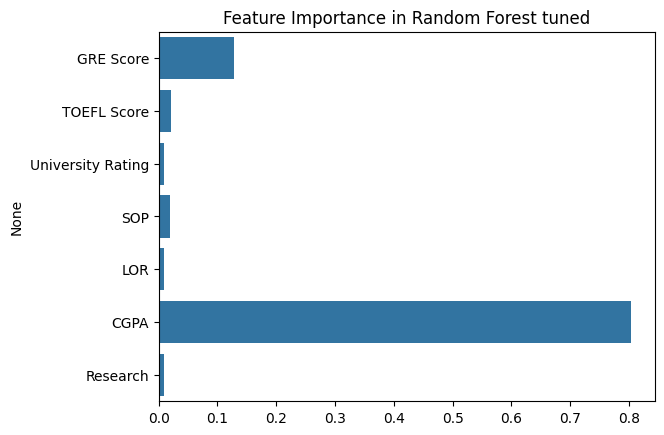

In [66]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg1.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()
